#Сплайны.

mms, 9.10.2022-24 (8.10.24)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Простейшая линейная интерполяция средствами numpy
X = np.linspace(-1, 1, 6)
Y = np.cos(X) + 0.1*np.random.rand(6)
x = np.linspace(-1, 1, 200)    # большее количество точек, где будем считать интерполированное значение
p = np.interp(x, X, Y)
plt.plot(X, Y, 'ro', x, p, '-')
#plt.plot(X, Y, 'ro', X, Y, '-')  # */на графике то же, что и от 3-x предыдущих строк.
plt.show()

## 1D-интерполяция. scipy.interpolate.interp1d

In [ ]:
# В scipy возможны варианты более сложной (квадратичной или кубической) интерполяции.
# 1-D интерполяция (класс interp1d из scipy.interpolate):
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

X = np.linspace(0, 10, 10)
Y = np.cos(-X**2/9.0)
f1 = interpolate.interp1d(X, Y,kind = 1)
f2 = interpolate.interp1d(X, Y, kind = 2)
f3 = interpolate.interp1d(X, Y, kind = 'cubic')
x = np.linspace(0, 10,100)
plt.plot(X, Y, 'o', x, f1(x), '-', x, f3(x), 'r', x, f2(x), 'g')
plt.legend(['data', 'linear', 'cubic', 'quadr'], loc = 'best')
plt.show()

# Вопрос: а какая интерполяция лучше?  1) добавьте график функции
# 2) посмотрите на график абсолютной ошибки

## О феномене Рунге

In [ ]:
# О феномене Рунге
# Функция Рунге очень плохо интерполируется полиномами из-за биений на концах.
# Проверьте пример ниже для числа точек 5,7,15.
# Поэтому были придуманы сплайны (1946г).

import numpy as np
import matplotlib.pyplot as plt
from numpy import polynomial as P

def runge(x):
    return 1/(1 + 25 * x**2)

X=np.linspace(-1,1,7)
Y=runge(X)
xn=np.linspace(-1,1,100)
yn = runge(xn)

p = P.Polynomial.fit(X,Y,6)
#s= interpolate.interp1d(X, Y, kind = 'cubic')
plt.plot(X,Y,'o',xn,yn,'b',label='runge')
plt.plot(xn,p(xn),'r', label='poly')
#plt.plot(xn,s(xn),'g--',label='spline')
plt.grid()
plt.legend()
plt.show()

#plt.plot(xn, p(xn)-yn,'r', label='poly')
#plt.plot(xn, s(xn)-yn, 'g', label='spline')
#plt.legend()
#plt.title("Error")
#plt.show()


## Класс scipy.interpolate.CubicSpline (рекомендуется вместо interp1d)

In [ ]:

# Класс scipy.interpolate.CubicSpline(x, y, axis=0, bc_type='not-a-knot', extrapolate=None)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html
#       * 'not-a-knot' (default): The first and second segment at a curve end
#         are the same polynomial. It is a good default when there is no
#         information on boundary conditions.
#       * 'periodic': The interpolated functions is assumed to be periodic
#         of period ``x[-1] - x[0]``. The first and last value of `y` must be
#         identical: ``y[0] == y[-1]``. This boundary condition will result in
#         ``y'[0] == y'[-1]`` and ``y''[0] == y''[-1]``.
#       * 'clamped': The first derivative at curves ends are zero. Assuming
#         a 1D `y`, ``bc_type=((1, 0.0), (1, 0.0))`` is the same condition.
#       * 'natural': The second derivative at curve ends are zero. Assuming
#         a 1D `y`, ``bc_type=((2, 0.0), (2, 0.0))`` is the same condition.
# В этом примере кубический сплайн используется для интерполяции дискретизированной
# синусоиды. Видно, что свойство непрерывности сплайна выполняется для первой и
# второй производной и нарушается только для третьей производной.
#
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = np.linspace(0,8,10)
y = np.sin(x)
cs = CubicSpline(x, y)
xs = np.linspace(0,8,100)
plt.plot(xs, np.sin(xs), '--', label='original',lw=4)
plt.plot(xs, cs(xs), label="S")
plt.plot(xs, cs(xs, 1), label="S'")    # При вызове объекта CubicSpline можно передать второй аргумент,
                                       # - для вычисления производной указанного порядка.
plt.plot(xs, cs(xs, 2), label="S''")
plt.plot(xs, cs(xs, 3), label="S'''")
plt.plot(xs, cs(xs, 4), label="S''''")
#plt.xlim(-0.5, 9.5)
plt.legend(loc='upper right', ncol=2)
plt.show()


## Фундаментальные сплайны

Полезно, если надо интерполировать много функций на одной и той же сетке узлов. Фундаментальные сплайны интерполируют таблицы $\delta_{ij}$, т.е. сплайн $F_0$ удовлетворяет условиям:

$$F_0(x_0)=1, F_0(x_1)=0, ..., F_0(x_N)=0,$$

а сплайн $F_k$ удовлетворяет

$$F_k(x_0)=0, ..., F_0(x_k)=1, ..., F_0(x_N)=0$$

Если фундаментальные сплайны построены, то задача интерполяции произвольной функции сводится к вычислению суммы:

$$S(x)=\sum_{j=1}^N f(x_j)F_j(x)$$


In [ ]:
# (v.1) Фундаментальные сплайны.
# Удобно, когда нужно интерполировать много функций по одному набору X.
X=np.linspace(0,1,5)
Y=np.eye(len(X))
x=np.linspace(X[0],X[4],200)
for i in range(len(X)):
  cs=CubicSpline(X, Y[i])
  plt.plot(X,Y[i],'ro')
  plt.plot(x, cs(x), label=i)
plt.legend(loc='lower right')
plt.title('Fundamental splines')
plt.show()

In [ ]:
# (v.2) Фундаментальные сплайны (два варианта - с сохраннием всех фунд. сплайнов
# как списка или в массиве объектов, чтобы использовать их в следующем задании)

X=np.linspace(0,1,5)
Y=np.eye(len(X))
x=np.linspace(X[0],X[4],200)
#CS=[]
Z=np.zeros(len(X), dtype=object)
for i in range(5):
#    CS.append(CubicSpline(X, Y[i]))
#    Z[i]=CubicSpline(X, Y[i])
#    plt.plot(X,Y[i],'ro')
#    plt.plot(x, CS[i](x), label=i)
    Z[i]=CubicSpline(X, Y[i])
    plt.plot(X,Y[i],'ro')
    plt.plot(x, Z[i](x), label=i)
plt.show()

In [ ]:
# Рассмотрим пару функций на нашей сетке X=np.linspace(0,1,5) и
# проверим, что их обычная интерполяция кубическими сплайнами эквивалентна
# интерполяции с использованием фундаментальных сплайнов.

f1=lambda x: np.cos(4*x)
f2=lambda x: np.log(x+2) - np.sin(3*x)

plt.plot(X,f1(X),'bo',x,f1(x),'b')
plt.plot(X,f2(X),'ro',x,f2(x),'r')
plt.title('Original functions')
plt.show()

# Определяем функцию построения сплайна по фундаментальным сплайнам Z, которые построили выше.
def S(f,X,Z,x):
    S=0
    for i in range(len(X)):
        S=S+f(X[i])*Z[i](x)
    return S

# Cтроим графики интерполяции по фундаментальным сплайнам и смотрим ошибку

fig = plt.figure(figsize=(20,5))

plt.subplot(121)
plt.plot(x, S(f1,X,Z,x),'b', label='f1')
plt.plot(x, S(f2,X,Z,x),'r', label='f2')
plt.legend()
plt.title('Fund Splines')

plt.subplot(122)
plt.plot(x, f1(x)-S(f1,X,Z,x),'b', label='f1')
plt.plot(x, f2(x)-S(f2,X,Z,x),'r', label='f2')
plt.legend()
plt.title('Error: Fund Splines')
plt.show()

In [ ]:
# Задание 5. Постройте интерполяцию этих функций по тем же 5 точкам
# кубическими сплйнами. Постройте аналогичные графики. Сравните отклонения
# от оригинала для этого варианта и для варианта с фунд. сплайнами (постройте
# график разности отклонений)

## Задания

In [ ]:
# Задание_1. Выполните интерполяцию функций  2*cos(x) и 2*cos(x^2) кубическими
# сплайнами на [-1,2] по 5 точкам. Для какой из функций получается более точное
# приближение?  (Посчитайте среднеквадратичное отклонение от оригинальной
# функции по 100 точкам указанного интервалаm, CO = sqrt(sum(S(xi)-f(xi))^2/N)

# Задание_2. Написать функцию, которая выводит два графика  - отклоненние кубического
# сплайна и отклонение интерполяционного полинома  от функции 2*cos(x). В качестве
# параметров функция должна принимать границы интервала интерполяции (L,R) и число узлов N.
# Проверить на L=-pi/3, R=pi/2, N=6

# Задание_3. Постройте сплайны для sin(x) по 8 точкам с различными граничными условиями.

# Задание_4. Попробуйте на отрезке [0,5] исследовать сплайн-интерполяцию функции
# f(x)=sin(5*x)*exp(-0.3*x^2), используя сплайны с гранич.условиями по умолчанию,
# а потом с периодическими гранич.условиями. Объясните результат.

## *) Опционально.

### Сплайн-интерполяция. Cглаживание.

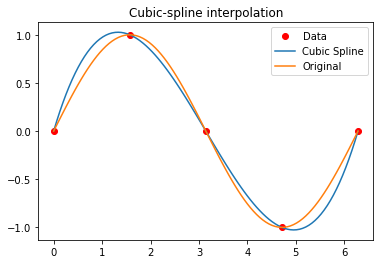

In [ ]:
# Сплайн-интерполяция. Cглаживание.
# https://docs.scipy.org/doc/scipy/tutorial/interpolate/smoothing_splines.html
# Задача интерполяции состоит в том, чтобы построить кривую, проходящую через заданный
# заданный набор точек данных. Это может быть неприемлемо, если данные зашумлены.
# Тогда можно построить плавную кривую, которая приближает входные данные, не проходя
# точно через каждую точку.
# splrep(x, y)  и splev(x,tck), а такжже sproot(tck) и spalde(xnew, tck)

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

x = np.linspace(0, 2*np.pi, 5)               # +Посмотреть [0,2pi]; + график [-3;3pi]
y = np.sin(x)
tck = interpolate.splrep(x, y )        # вычислим сплайн-представление кривой.
                                           # s=0 - значит без сглаживания,
                                           # по def s=m-sqrt(2*m), где m-число точек
xnew = np.linspace(0, 2*np.pi, 100)
ynew = interpolate.splev(xnew, tck)  # вычислим значение функции в сплайн-приближении
plt.plot(x, y, 'ro', xnew, ynew, xnew, np.sin(xnew))
plt.legend(['Data', 'Cubic Spline', 'Original'])
plt.title('Cubic-spline interpolation')
plt.show()

In [ ]:
print(list(tck))

In [ ]:
# Корни сплайна
interpolate.sproot(tck)       # может не находить, если корень на самом краю интервала


array([3.14159265, 6.28318531])

In [ ]:
# немного увеличим интервал, а потом число точек для улучшения точности
x = np.linspace(-0.25, 2*np.pi + np.pi/4, 25)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0)
interpolate.sproot(tck)


array([-7.05694685e-06,  3.14159424e+00,  6.28317897e+00])

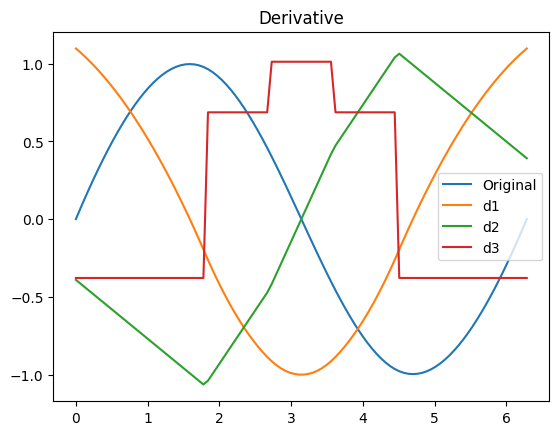

In [ ]:
# Производная сплайна
# ? на x = np.linspace(0, np.pi, 5) нормально, [0,2pi] - врет..  нужно увеличивать число узлов
x = np.linspace(0, 2*np.pi, 8)
y = np.sin(x)
xnew = np.linspace(0, 2*np.pi, 100)
tck = interpolate.splrep(x, y)
d0 = interpolate.splev(xnew, tck, der=0)
dy1 = interpolate.splev(xnew, tck, der=1)
dy2 = interpolate.splev(xnew, tck, der=2)
dy3 = interpolate.splev(xnew, tck, der=3)

plt.plot( xnew, d0, xnew, dy1, xnew, dy2,xnew, dy3)
plt.legend(['Original', 'd1','d2','d3'])
plt.title('Derivative')
plt.show()

In [ ]:
# для сравнения через отдельную функцию spalde
yders = interpolate.spalde(xnew, tck)
for i in range(len(yders[0])):
   plt.plot(xnew, [d[i] for d in yders], '--', label=i)
plt.legend()
plt.title('All derivatives')
plt.show()

In [ ]:
# Фундаментальные сплайны.(v.1)
# Удобно, когда нужно интерполировать много функций по одному набору X.
X=np.linspace(0,np.pi,5)
Y=np.eye(len(X))
xnew=np.linspace(X[0],X[4],200)
for i in range(5):
  S=interpolate.splrep(X, Y[i], s=0)
  plt.plot(X,Y[i],'ro')
  plt.plot(xnew, interpolate.splev(xnew, S), label=i)
#plt.legend(loc='lower right',)
plt.title('Fundamental splines')
plt.show()

###Одномерный сглаживающий сплайн

*) Еще больше см.https://docs.scipy.org/doc/scipy/tutorial/interpolate.html

**Одномерный сглаживающий сплайн**: класс UnivariateSpline в scipy.interpolate – это метод для создания функции на основе класса фиксированных точек данных – **scipy.interpolate.UnivariateSpline (x, y, w = None, k = 3, s)**.
Это соответствует сплайну y = spl (x) степени k для предоставленных данных x, y.

    ‘w’ – вес для подгонки сплайна. Должен быть >0. Если нет (по умолчанию), все веса равны.
    ‘s’ – определяет количество узлов, указывая условие сглаживания.
    ‘k’ – степень сглаживающего сплайна. Должно быть <= 5. По умолчанию k = 3, кубический сплайн.

Класс **InterpolatedUnivariateSpline**  всегда проходит через все точки (что эквивалентно принудительному присвоению параметру сглаживания значения 0)

Класс **LSQUnivariateSpline**  позволяет явно указывать количество и расположение внутренних узлов с помощью параметра t, т.е. создавать настраиваемые сплайны с нелинейным интервалом, интерполировать в одних областях и сглаживать в других или изменять характер сплайна.



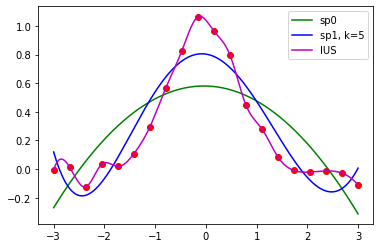

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#from scipy.interpolate import UnivariateSpline
from scipy import interpolate

x = np.linspace(-3, 3, 20)
y = np.exp(-x**2) + 0.05 * np.random.randn(20)
#w = np.exp(-(x**2)/2)/3
#plt.plot(x, y, 'ro', x,w,'k')
plt.plot(x, y, 'ro')

sp0 = interpolate.UnivariateSpline(x, y)
spl = interpolate.UnivariateSpline(x, y, k=5)
s = interpolate.InterpolatedUnivariateSpline(x, y)  # класс InterpolatedUnivariateSpline всегда проходит через все точки
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, sp0(xs), 'g', label="sp0")
plt.plot(xs, spl(xs), 'b', label="sp1, k=5")
plt.plot(xs,s(xs),'m',label="IUS")
plt.legend()
plt.show()

###2-D Пример

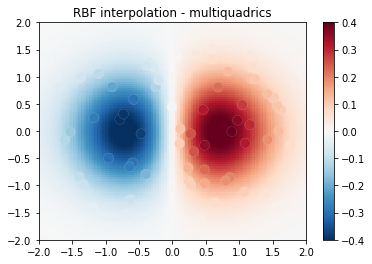

In [ ]:
#2-D Пример
#В этом примере показано, как интерполировать разрозненные двумерные данные:

import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
from matplotlib import cm

# 2-d tests - setup scattered data
rng = np.random.default_rng()
x = rng.random(100)*4.0-2.0
y = rng.random(100)*4.0-2.0
z = x*np.exp(-x**2-y**2)
edges = np.linspace(-2.0, 2.0, 101)
centers = edges[:-1] + np.diff(edges[:2])[0] / 2.
XI, YI = np.meshgrid(centers, centers)

# use RBF
rbf = Rbf(x, y, z, epsilon=2)
ZI = rbf(XI, YI)

# plot the result
plt.subplot(1, 1, 1)
X_edges, Y_edges = np.meshgrid(edges, edges)
lims = dict(cmap='RdBu_r', vmin=-0.4, vmax=0.4)
plt.pcolormesh(X_edges, Y_edges, ZI, shading='flat', **lims)
plt.scatter(x, y, 100, z, edgecolor='w', lw=0.1, **lims)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()